### Q-1-3-3

Analyse and report the behaviour of the coefficients(for example: sign of coefficients, value of coefficients etc.) and support it with appropriate plots as necessary

In [33]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sys

from pylab import *
import matplotlib
import matplotlib.pyplot as plt

loading data from csv to dataframe

In [34]:
df = pd.read_csv("../input_data/AdmissionDataset/data.csv")
X  = df.drop(['Serial No.', 'Chance of Admit '],axis='columns')
Y  = df['Chance of Admit ']
X = (X - X.mean())/X.std()
# X  = pd.DataFrame( preprocessing.scale(X), columns = [ i for i in X ])
# X  = pd.concat([  X, df['Research'] ], axis='columns')
# X.head()

append column of ONES at 0th index. 

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train1 = X_train.reset_index(drop=True)
Y_train1 = Y_train.reset_index(drop=True)

ones = pd.DataFrame(1, index=np.arange(X_train1.shape[0]), columns=["a"])

X_train1 = pd.concat( [ones, X_train1], axis='columns')

X_train1 = np.array(X_train1)
Y_train1 = np.array(Y_train1).reshape((X_train1.shape[0],1))

method to calculate values of theta using gradient descent

In [36]:
theta = np.zeros([1,8])
alpha = 0.01
iters = 1000

def grad_desc(X,y,theta,iters,alpha):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * ( np.matmul(X , theta.T) - y), axis=0)
    return theta

g = grad_desc(X_train1,Y_train1,theta,iters,alpha)

predict function 

In [37]:
thetalist = g[0]
def predict(X_test):
    y_pred= list()
    for index,row in X_test.iterrows():
        row=list(row)
        y1=0
        for i in range(1,8):
            y1=y1+thetalist[i]*row[i-1]
        y1=y1+thetalist[0]
        y_pred.append(y1)
    return y_pred
y_pred_mymodel = predict(X_train)

inbuilt sckit-learn Linear Regression.

printing theta for both lists.

In [ ]:
# print [regressor.intercept_ ] + list(regressor.coef_ )
print(thetalist)

### Observation

the value of coefficient decides how much that feature dominates. e.g.  CGPA feature for this dataset.

Text(0.5,1,'Residual plot for GRE Score')

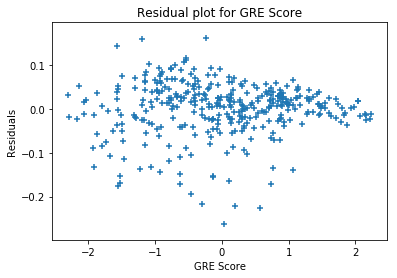

In [38]:
x_axis = X_train['CGPA']
y_axis = Y_train - y_pred_mymodel

figure()
scatter(x_axis,y_axis,marker='+' )
xlabel("GRE Score")
ylabel("Residuals")
title("Residual plot for GRE Score")

Text(0.5,1,'Residual plot for TOEFL Score')

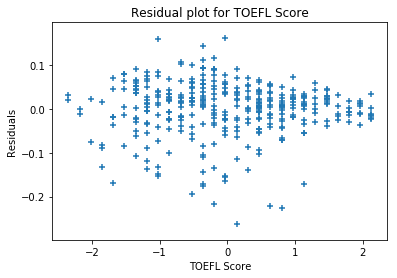

In [39]:
x_axis = X_train['TOEFL Score']
y_axis = Y_train - y_pred_mymodel

figure()
scatter(x_axis,y_axis,marker='+' )
xlabel("TOEFL Score")
ylabel("Residuals")
title("Residual plot for TOEFL Score")